# Лабораторная работа 3
# Анимация движения секущей прямой к заданной кривой

Шпак Андрей Валерьевич, 26.07.2022

# Задание 3.1 (Анимация построения графика аналитически заданной функции)

$\color{red}{Создайте}$ $\color{red}{анимацию}$ построения графика некоторой явно заданной аналитической функции $y = y \left( x \right)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x_{max}$ с шагом $step$.

Выполните задание при $y \left( x \right) = \left( x - 5 \right)^2$, $x_{min} = 0$, $x_{max} = 10$, $step = 0.1$.

Выполните задание для произвольной, Вами выбранной, нелинейной аналитической функции $y = y \left( x \right)$, $x_{min} = k$, $x_{max} = k + 5$, $step = 0.01k$, где $k$ номер Вашего варианта.

# Реализация задания 3.1

In [1]:
from matplotlib.animation import FuncAnimation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import ipympl
# в условии лабораторной было написано, что импортировать модуль ipympl в блокноте JN не нужно

In [4]:
# специальная команды JN, необходимая для коректного отображения анимации в блокноте
%matplotlib widget

Буду строить анимацию для функции вида $y \left( x \right) = \left( x - 5 \right)^2$ по значениям $x$, изменяющимся от $x_{min} = 0$ до $x_{max} = 10$ с шагом $step = 0.1$.

Опишу функцию $y = y \left( x \right)$ с применением синтаксиса lambda-функций.

In [5]:
y = lambda x: (x - 5) ** 2
# задаю переменные
x_min = 0.; x_max = 10.; step = 0.1

Создаю массив x_array равномерно распределенных чисел на отрезке $\left[ x_{min}, x_{max} \right]$ с шагом step, а так же массив y_array соответствующих значений $y.$

In [6]:
x_array = np.arange(x_min, x_max, step)
y_array = np.array([y(x) for x in x_array])

На основании двух массивов x_array, y_array создам матрицу координат точек графика функции $y \left( x \right)$.

Матрица состоит из двух столбцов. Первый столбец матрицы хранить $x$-координаты точек, второй столбец хранит $y$-координаты точек.

In [7]:
matrix = np.array([x_array, y_array])

In [8]:
# транспонирую
matrix = np.transpose(np.array([x_array, y_array]))

(-1.0, 11.0, -1.0, 26.0)

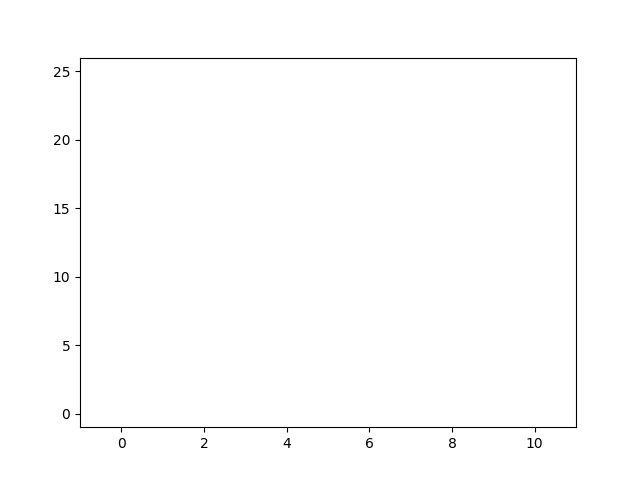

In [9]:
# графическое окно, в котором в дальнейшем будет осуществляться анимация
fig1 = plt.figure()
# cоздам графическую область и задам для нее пределы по осям
y_min, y_max = np.min(y_array), np.max(y_array)
# графическая область
ax1 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

In [10]:
# с помощью функции plot из пакета pyplot создам в графической области ax1 графический объект 
# типа Line2D черного цвета, координаты которого пока не определены
# почему тут запятая?
line1, = ax1.plot([], [], 'k')
type(line1)

matplotlib.lines.Line2D

Определим пользовательскую функцию одного аргумента $\textbf{at_frame1}$, которая будет вызываться в каждом кадре анимации.

Аргумент функции at_frame1 является массивом из $x$-ой и $y$-ой уоординат точки графика функции. Функция at_frame1 добавляет к графическому объекту line1 точку с координатами $\left( x, y\right)$.

In [11]:
def at_frame1(t):
    """добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())
    
    x_coord.append(t[0])
    y_coord.append(t[1])
    
    line1.set_data(x_coord, y_coord)    
    return None

In [12]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(t)
    добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None



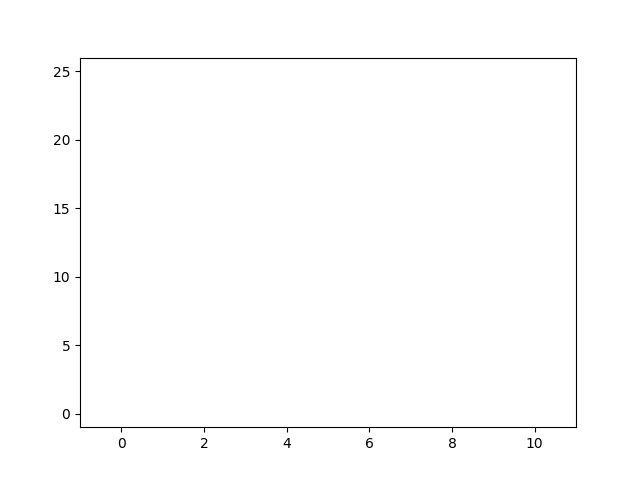

In [13]:
# для построения анимации полагаем необязательный аргумент frames для функции 
# FuncAnimation следующим образом frames = matrix
# это означает, что количество кадров анимации будет совпадать с 
# количеством строк матрицы matrix
# при этом для каждого кадра анимации будет вызываться функция at_frame1 
# со значением аргумента, равным массиву со значениями текущей строки матрицы matrix

# вызов функций figure, axes, plot, необходимых для анимации, а также 
# вызов функции FuncAnimation должны располагаться в одной ячейке кода

fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

line1, = ax1.plot([], [], 'k')
FuncAnimation(fig1, at_frame1, frames = matrix, repeat = False, interval = 100)

In [14]:
# мое задание
import math
f = lambda x: math.cos(x) * x ** 3
# задаю переменные
my_x_min = 2.; my_x_max = 7.; my_step = 0.02

In [15]:
my_x_array = np.arange(my_x_min, my_x_max, my_step)
my_y_array = np.array([f(x) for x in my_x_array])
my_y_min = np.min(my_y_array); my_y_max = np.max(my_y_array)

In [16]:
my_matrix = np.transpose(np.array([my_x_array, my_y_array]))

In [17]:
def anim(i):
    """добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None
    """
    my_x_coord = list(my_line.get_xdata())
    my_y_coord = list(my_line.get_ydata())
    
    my_x_coord.append(i[0])
    my_y_coord.append(i[1])
    
    my_line.set_data(my_x_coord, my_y_coord)    
    return None

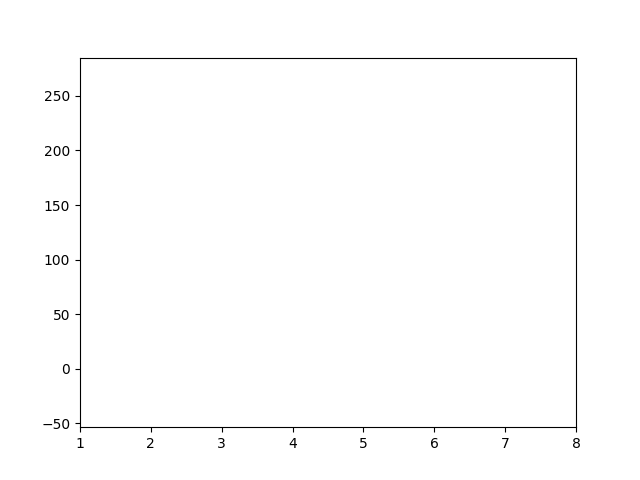

In [22]:
my_fig = plt.figure()
my_ax = plt.axes()
# не понимаю, почему этот график не хочет считаться с y
# я понял, у меня слишком большой масштаб)
plt.axis([my_x_min - 1, my_x_max + 1, my_y_min - 10, my_y_max + 10])

my_line, = my_ax.plot([], [], 'y--')
FuncAnimation(my_fig, anim, frames = my_matrix, repeat = False, interval = 20)

# Задание 3.2 (Анимация движения точки по графику функции)

Пусть аналитический вид функции $y = y \left( x \right)$ и значения переменны $x_{min}$, $x{max}$, $step$ задаются такими же, как и при выполнении задания $3.1$, согласно Вашему варианту.

$\color{red}{Создайте}$ $\color{red}{анимацию}$ движения точки по графику явно заданной аналитической функции $y = y \left( x \right)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x{max}$ с шагом $step$.

# Реализация задания 3.2